In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

Código de ejmplo para transformar una imagen webp a jpg de calidad similar
reduciendo el tamaño del archivo.
Curiosidades 
¿Qué significa el 90?
¿Qué otras opciones se tiene?

In [2]:
# image_path = "./puente_estrellado.webp"
# salida = "./puente_estrelado.jpg"

# try :
#     img = cv2.imread(image_path)
#     if not img is None :
#         cv2.imwrite(salida, img, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
#         print(f"Conversión realizada con exito {image_path} to {salida}")
#     else :
#         print(f"Error: Could load image from {image_path}")
# except Exception as e :
#     print(f"Error en: {e}")

### LISTA DE PUNTOS A RESOLVER
1. Lectura de imagen
2. Obtener el histograma Gray, RGB, HSV
3. Ecualizar la imagen mediante clahe
4. Transformación de brillo
5. Transformación de contraste
6. Transformación Gamma

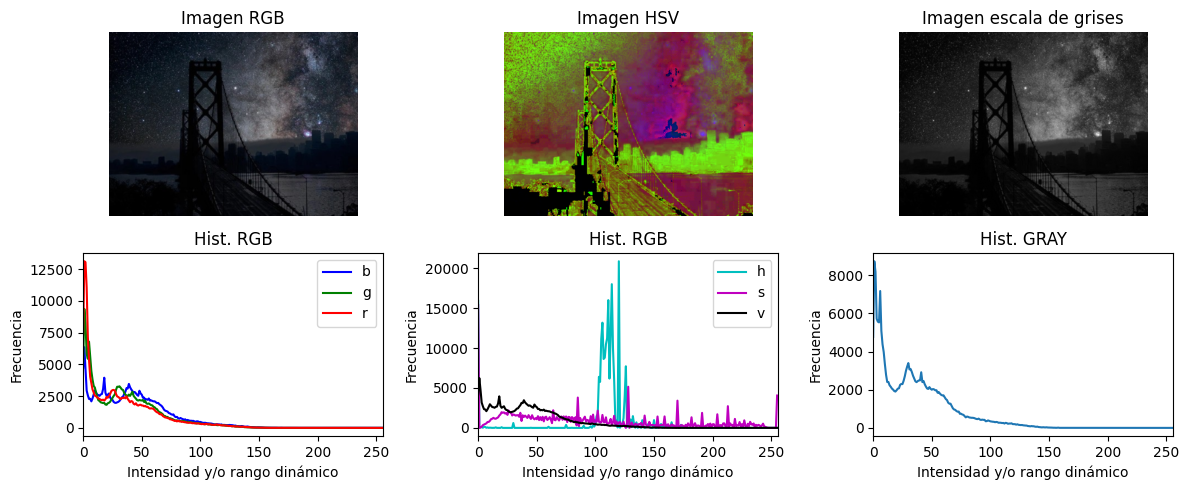

In [3]:
img = cv2.imread("./puente_estrellado.jpg")
img = cv2.resize(img, (0, 0), fx=1.2, fy=1.2)

img_grises = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Histogramas
hist_gray = cv2.calcHist([img_grises], [0], None, [256], [0, 256])

# Graficas
plt.figure(figsize=(12, 5))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Imagen RGB")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(img_hsv, cmap="hsv")
plt.title("Imagen HSV")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(img_grises, cmap="gray")
plt.title("Imagen escala de grises")
plt.axis("off")

# Hist RGB
plt.subplot(2, 3, 4)
i = 0
capas = ["b", "g", "r"]
for capa in capas :
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    i += 1
    plt.plot(hist, label=capa, color=capa)
    

plt.title("Hist. RGB")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad y/o rango dinámico")
plt.xlim([0, 256])
plt.legend()

# Hist HSV
plt.subplot(2, 3, 5)
i = 0
capas = ["h", "s", "v"]
hsv_colors = ["c", "m", "k"]
for capa in capas :
    hist = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
    plt.plot(hist, label=capa, color=hsv_colors[i])
    i += 1

plt.title("Hist. RGB")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad y/o rango dinámico")
plt.xlim([0, 256])
plt.legend()


plt.subplot(2, 3, 6)
plt.plot(hist_gray)
plt.title("Hist. GRAY")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad y/o rango dinámico")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# cv2.imshow("Puente", img_hsv)
# cv2.imshow("Puente gris", img_grises)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

##### Ecualizando las imágenes mediante clahe
Existen 3 modos de color para poder aplicar la ecualización de imágen y son aquellos que cuenta con una capa de luminosidad, entre ellos se encuentra:
1. HSV (Capa V)
1. YUV (Y)
1. YCrCb (Y)

(np.float64(-0.5), np.float64(539.5), np.float64(397.5), np.float64(-0.5))

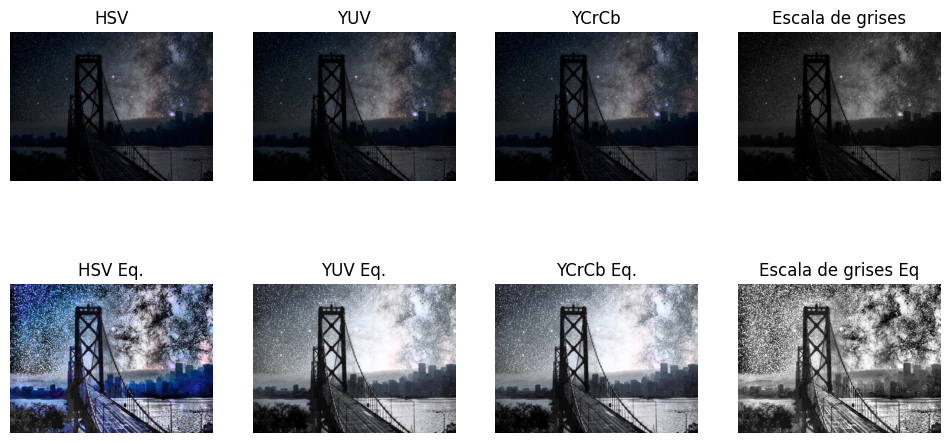

In [ ]:
# imagenes en su modo de color
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yrb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

img_hsv1 = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
img_yuv1 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
img_yrb1 = cv2.cvtColor(img_yrb, cv2.COLOR_YCrCb2RGB)
# Eq las imágenes
# Objeto clahe
clahe = cv2.createCLAHE( clipLimit=20.0, tileGridSize=(8, 8) )

img_hsv[:, :, 2] = clahe.apply(img_hsv[:,:,2])
img_hsv_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

img_yuv[:,:, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
img_yuv_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

y, r, b = cv2.split(img_yrb)
y_eq = cv2.equalizeHist(y)
img_yrb_eq = cv2.merge([y_eq, r, b])
img_yrb_eq = cv2.cvtColor(img_yrb_eq, cv2.COLOR_YCrCb2RGB)

img_grises_eq = clahe.apply(img_grises)



plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(img_hsv1)
plt.title("HSV")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(img_yuv1)
plt.title("YUV")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(img_yrb1)
plt.title("YCrCb")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(img_grises, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")

# Plot eq. images
plt.subplot(2, 4, 5)
plt.imshow(img_hsv_eq)
plt.title("HSV Eq.")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(img_yuv_eq)
plt.title("YUV Eq.")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(img_yrb_eq)
plt.title("YCrCb Eq.")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(img_grises_eq, cmap="gray")
plt.title("Escala de grises Eq")
plt.axis("off")